In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

# Custom modules (adjust the paths as necessary)
project_root = "/project_ghent/Mostafa/ActivityRecognition/DistInference"
project_root2 = "/project_ghent/Mostafa/ActivityRecognition/DistInference/src/DistInference"
os.chdir(project_root)
sys.path.append(project_root)
sys.path.append(project_root2)

from DistInference.evaluation_utils import evaluate_timestamped_model



/project_ghent/Mostafa/ActivityRecognition/DistInference/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Backbone 'resnet50' outputs 2048 features.
{'folds_json': 'five_folds.json', 'fold_index': 0, 'train_split_percentage': 0.8, 'batch_sizes': {'train': 512, 'validation': 8, 'test': 1}, 'normalization': 'none', 'force_dim': 314, 'shuffle': {'train': True, 'validation': False, 'test': False}, 'additive_noise_std': {'train': 0.0, 'validation': 0.0, 'test': 0.0}, 'num_workers': {'train': 4, 'validation': 0, 'test': 0}, 'stft': {'window_size': 128, 'overlap': 64}, 'model': {'name': 'resnet50', 'num_classes': 6, 'input_channels': 1, 'learn_order_of_importance': True, 'max_p': 1}, 'training': {'max_steps': 10000.0, 'learning_rate': '8e-4', 'weight_decay': '1e-2', 'save_steps': 100, 'logging_steps': 100, 'evaluation_strategy': 'steps', 'eval_steps': 100}, 'inference': {'noise_level': 0.0}}


/project_ghent/Mostafa/ActivityRecognition/DistInference/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


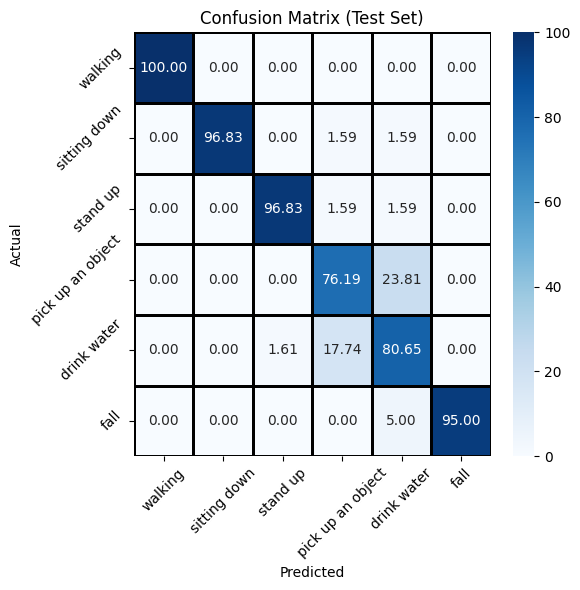

Test Accuracy: 0.9067796610169492
Test Confusion Matrix (%):
 [[100.           0.           0.           0.           0.
    0.        ]
 [  0.          96.82539683   0.           1.58730159   1.58730159
    0.        ]
 [  0.           0.          96.82539683   1.58730159   1.58730159
    0.        ]
 [  0.           0.           0.          76.19047619  23.80952381
    0.        ]
 [  0.           0.           1.61290323  17.74193548  80.64516129
    0.        ]
 [  0.           0.           0.           0.           5.
   95.        ]]


In [2]:
model_timestamp = "20250102_011646"
model_timestamp = "20250102_011414"

# # Evaluate a centralized model
# results_centralized = evaluate_timestamped_model(
#     model_timestamp=model_timestamp,
#     config_path="/project_ghent/Mostafa/ActivityRecognition/DistInference/config.yaml",
#     distributed=False,
#     do_plot=True,
#     plot_filename="centralized_cm.png"
# )
# print("Centralized:", results_centralized["test_confusion_matrix"])
results_dist = evaluate_timestamped_model(
    model_timestamp=model_timestamp,
    config_path="/project_ghent/Mostafa/ActivityRecognition/DistInference/config.yaml",
    distributed=True,             # Enable distributed pipeline
    do_plot=True,
    plot_filename=None,
    # Distributed-inference parameters
    num_bits=8,
    use_bit_budget=False,
    total_bits=None,             
    p_mask=99,                  
    mask_strategy='last', # norm last
)

print("Test Accuracy:", results_dist["test_accuracy"])
print("Test Confusion Matrix (%):\n", results_dist["test_confusion_matrix"])

Backbone 'resnet50' outputs 2048 features.
{'folds_json': 'five_folds.json', 'fold_index': 0, 'train_split_percentage': 0.8, 'batch_sizes': {'train': 512, 'validation': 8, 'test': 1}, 'normalization': 'none', 'force_dim': 314, 'shuffle': {'train': True, 'validation': False, 'test': False}, 'additive_noise_std': {'train': 0.0, 'validation': 0.0, 'test': 0.0}, 'num_workers': {'train': 4, 'validation': 0, 'test': 0}, 'stft': {'window_size': 128, 'overlap': 64}, 'model': {'name': 'resnet50', 'num_classes': 6, 'input_channels': 1, 'learn_order_of_importance': True, 'max_p': 1}, 'training': {'max_steps': 10000.0, 'learning_rate': '8e-4', 'weight_decay': '1e-2', 'save_steps': 100, 'logging_steps': 100, 'evaluation_strategy': 'steps', 'eval_steps': 100}, 'inference': {'noise_level': 0.0}}


/project_ghent/Mostafa/ActivityRecognition/DistInference/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


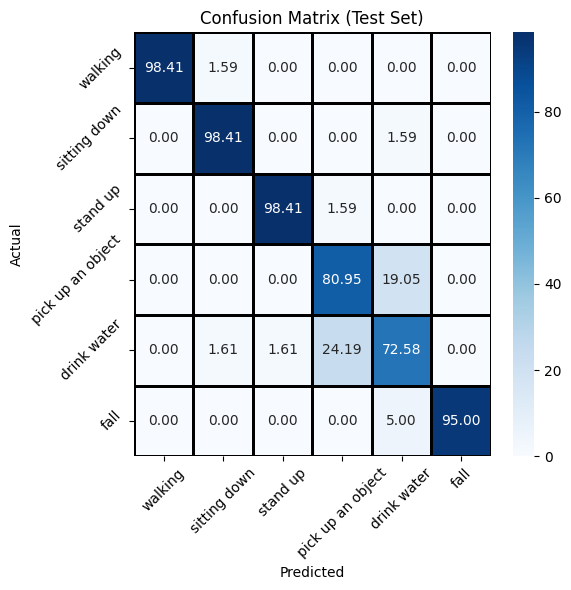

Backbone 'resnet50' outputs 2048 features.
{'folds_json': 'five_folds.json', 'fold_index': 0, 'train_split_percentage': 0.8, 'batch_sizes': {'train': 512, 'validation': 8, 'test': 1}, 'normalization': 'none', 'force_dim': 314, 'shuffle': {'train': True, 'validation': False, 'test': False}, 'additive_noise_std': {'train': 0.0, 'validation': 0.0, 'test': 0.0}, 'num_workers': {'train': 4, 'validation': 0, 'test': 0}, 'stft': {'window_size': 128, 'overlap': 64}, 'model': {'name': 'resnet50', 'num_classes': 6, 'input_channels': 1, 'learn_order_of_importance': True, 'max_p': 1}, 'training': {'max_steps': 10000.0, 'learning_rate': '8e-4', 'weight_decay': '1e-2', 'save_steps': 100, 'logging_steps': 100, 'evaluation_strategy': 'steps', 'eval_steps': 100}, 'inference': {'noise_level': 0.0}}


/project_ghent/Mostafa/ActivityRecognition/DistInference/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


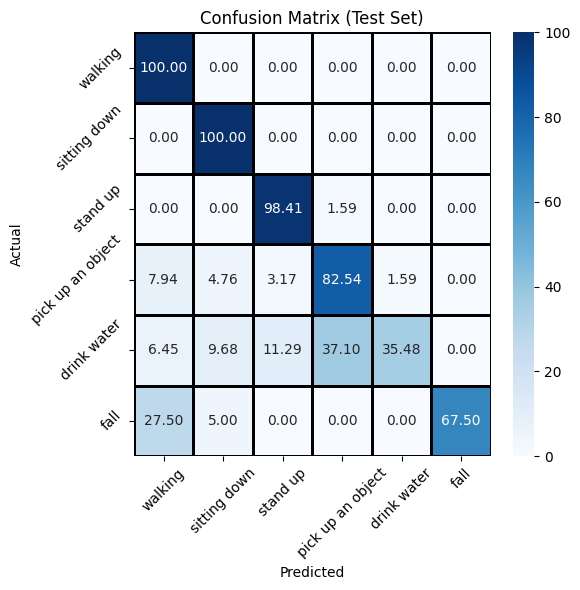

Backbone 'resnet50' outputs 2048 features.
{'folds_json': 'five_folds.json', 'fold_index': 0, 'train_split_percentage': 0.8, 'batch_sizes': {'train': 512, 'validation': 8, 'test': 1}, 'normalization': 'none', 'force_dim': 314, 'shuffle': {'train': True, 'validation': False, 'test': False}, 'additive_noise_std': {'train': 0.0, 'validation': 0.0, 'test': 0.0}, 'num_workers': {'train': 4, 'validation': 0, 'test': 0}, 'stft': {'window_size': 128, 'overlap': 64}, 'model': {'name': 'resnet50', 'num_classes': 6, 'input_channels': 1, 'learn_order_of_importance': True, 'max_p': 1}, 'training': {'max_steps': 10000.0, 'learning_rate': '8e-4', 'weight_decay': '1e-2', 'save_steps': 100, 'logging_steps': 100, 'evaluation_strategy': 'steps', 'eval_steps': 100}, 'inference': {'noise_level': 0.0}}


/project_ghent/Mostafa/ActivityRecognition/DistInference/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


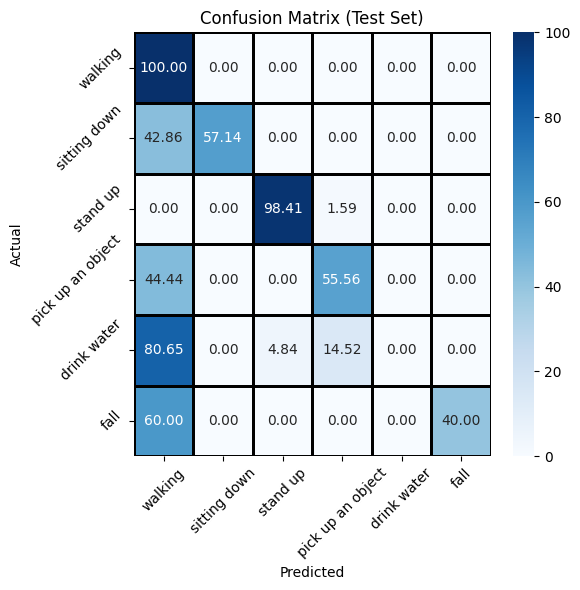

Backbone 'resnet50' outputs 2048 features.
{'folds_json': 'five_folds.json', 'fold_index': 0, 'train_split_percentage': 0.8, 'batch_sizes': {'train': 512, 'validation': 8, 'test': 1}, 'normalization': 'none', 'force_dim': 314, 'shuffle': {'train': True, 'validation': False, 'test': False}, 'additive_noise_std': {'train': 0.0, 'validation': 0.0, 'test': 0.0}, 'num_workers': {'train': 4, 'validation': 0, 'test': 0}, 'stft': {'window_size': 128, 'overlap': 64}, 'model': {'name': 'resnet50', 'num_classes': 6, 'input_channels': 1, 'learn_order_of_importance': True, 'max_p': 1}, 'training': {'max_steps': 10000.0, 'learning_rate': '8e-4', 'weight_decay': '1e-2', 'save_steps': 100, 'logging_steps': 100, 'evaluation_strategy': 'steps', 'eval_steps': 100}, 'inference': {'noise_level': 0.0}}


/project_ghent/Mostafa/ActivityRecognition/DistInference/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


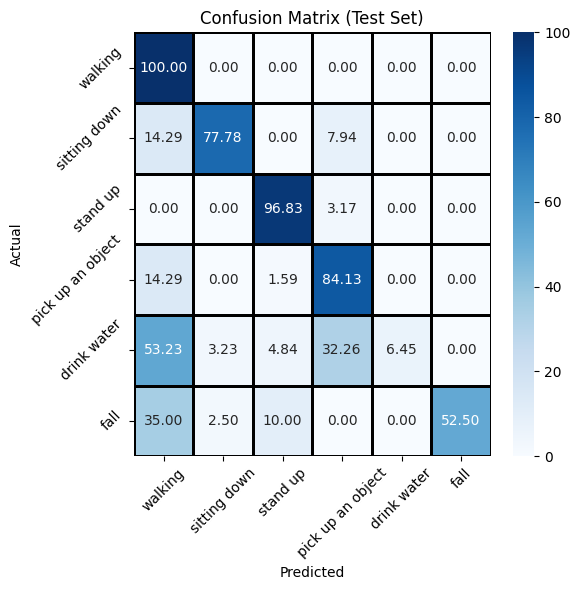

Backbone 'resnet50' outputs 2048 features.
{'folds_json': 'five_folds.json', 'fold_index': 0, 'train_split_percentage': 0.8, 'batch_sizes': {'train': 512, 'validation': 8, 'test': 1}, 'normalization': 'none', 'force_dim': 314, 'shuffle': {'train': True, 'validation': False, 'test': False}, 'additive_noise_std': {'train': 0.0, 'validation': 0.0, 'test': 0.0}, 'num_workers': {'train': 4, 'validation': 0, 'test': 0}, 'stft': {'window_size': 128, 'overlap': 64}, 'model': {'name': 'resnet50', 'num_classes': 6, 'input_channels': 1, 'learn_order_of_importance': True, 'max_p': 1}, 'training': {'max_steps': 10000.0, 'learning_rate': '8e-4', 'weight_decay': '1e-2', 'save_steps': 100, 'logging_steps': 100, 'evaluation_strategy': 'steps', 'eval_steps': 100}, 'inference': {'noise_level': 0.0}}


/project_ghent/Mostafa/ActivityRecognition/DistInference/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


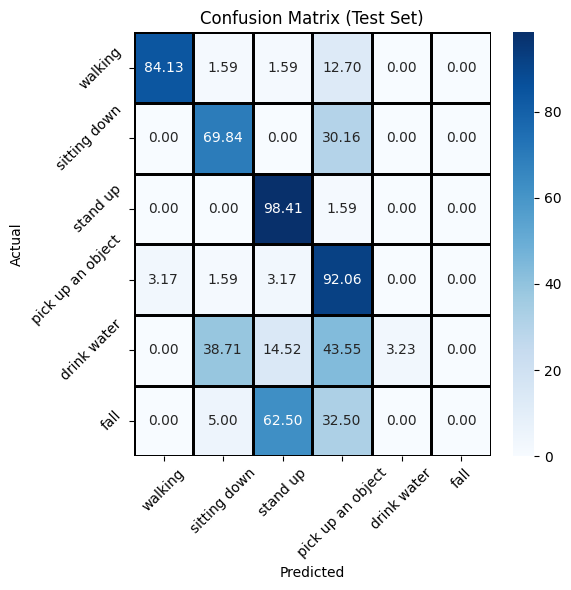

Backbone 'resnet50' outputs 2048 features.
{'folds_json': 'five_folds.json', 'fold_index': 0, 'train_split_percentage': 0.8, 'batch_sizes': {'train': 512, 'validation': 8, 'test': 1}, 'normalization': 'none', 'force_dim': 314, 'shuffle': {'train': True, 'validation': False, 'test': False}, 'additive_noise_std': {'train': 0.0, 'validation': 0.0, 'test': 0.0}, 'num_workers': {'train': 4, 'validation': 0, 'test': 0}, 'stft': {'window_size': 128, 'overlap': 64}, 'model': {'name': 'resnet50', 'num_classes': 6, 'input_channels': 1, 'learn_order_of_importance': True, 'max_p': 1}, 'training': {'max_steps': 10000.0, 'learning_rate': '8e-4', 'weight_decay': '1e-2', 'save_steps': 100, 'logging_steps': 100, 'evaluation_strategy': 'steps', 'eval_steps': 100}, 'inference': {'noise_level': 0.0}}


/project_ghent/Mostafa/ActivityRecognition/DistInference/.venv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


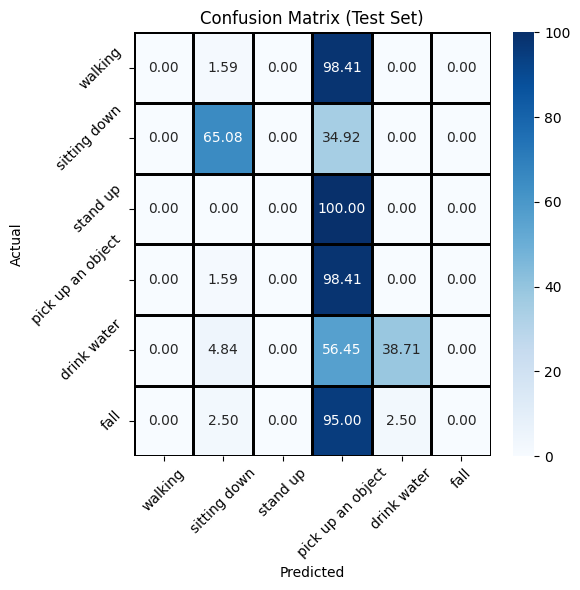

In [19]:
model_timestamp = "20250102_011414"
model_timestamp = "20250102_011646"

compression_ratios = [1, 10, 50, 100, 500, 1000]

all_figs = []

for comp_ratio in compression_ratios:
    p_mask = 100 * (comp_ratio - 1 ) / comp_ratio

    results_dist = evaluate_timestamped_model(
    model_timestamp=model_timestamp,
    config_path="/project_ghent/Mostafa/ActivityRecognition/DistInference/config.yaml",
    distributed=True,             # Enable distributed pipeline
    do_plot=True,
    plot_filename=None,
    # Distributed-inference parameters
    num_bits=8,
    use_bit_budget=False,
    total_bits=None,             
    p_mask=p_mask,                  
    mask_strategy='norm', # norm last
)
    all_figs.append(results_dist['fig'])
    

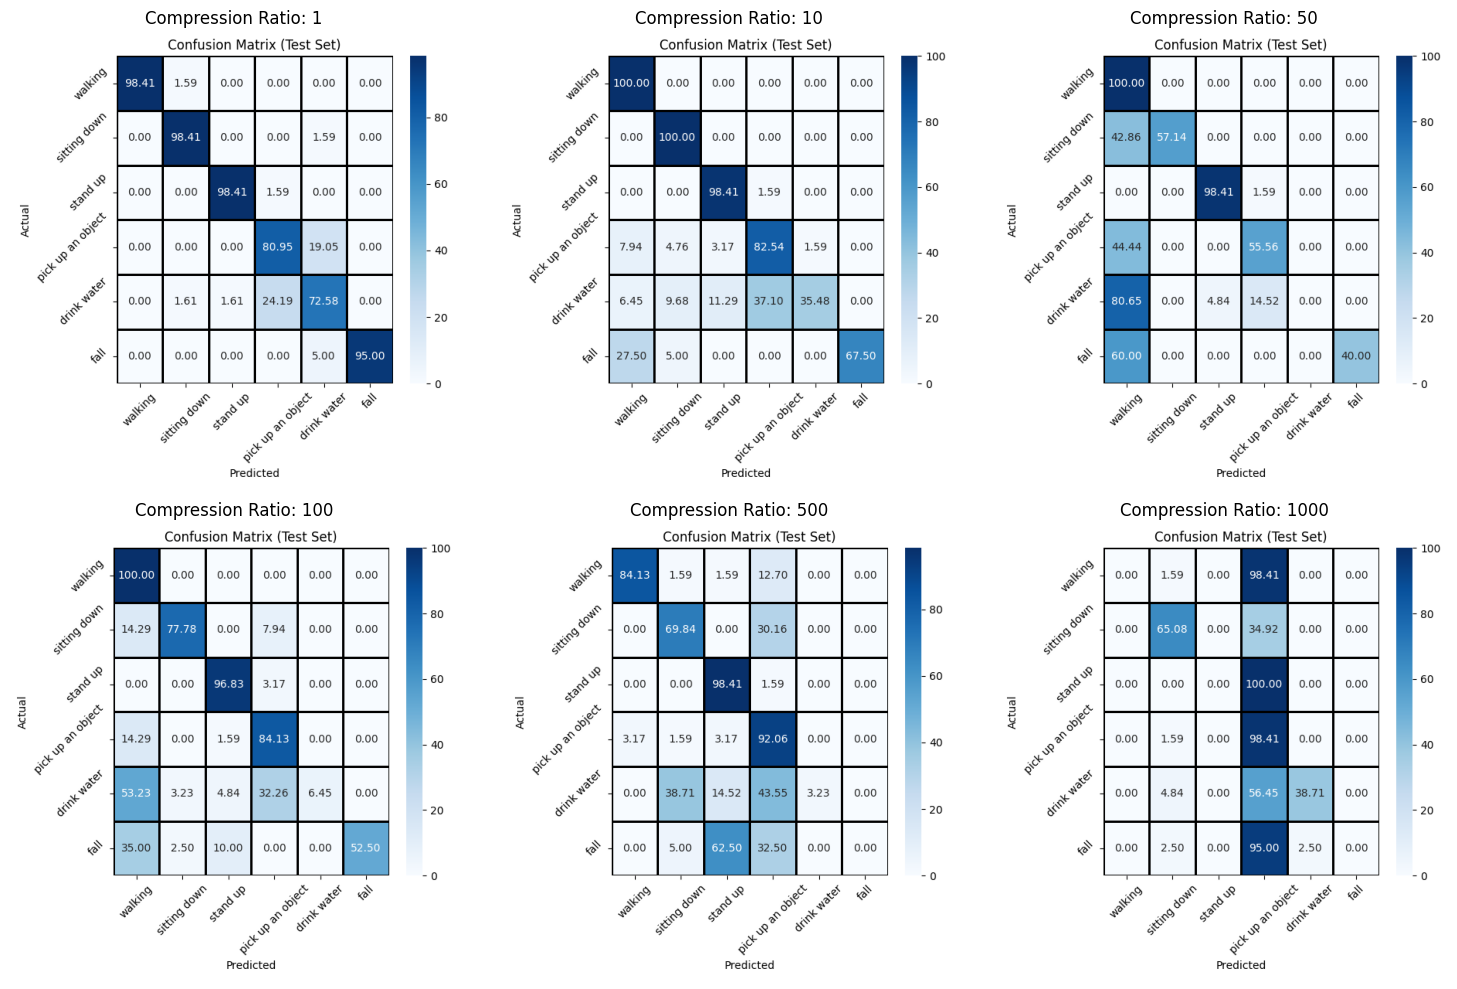

In [21]:
import matplotlib.pyplot as plt

# Assuming `all_figs` is populated with the figures from the loop
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Create a 3x2 grid of subplots

# Flatten axes array for easier indexing
axes = axes.flatten()

# Iterate over the figures and plot them in the respective axes
for i, ax in enumerate(axes):
    if i < len(all_figs):  # Ensure we do not exceed the number of figures
        fig_to_plot = all_figs[i]
        ax.imshow(fig_to_plot.canvas.buffer_rgba())  # Use buffer_rgba to render the figure
        ax.axis('off')  # Turn off axis for better presentation
        ax.set_title(f"Compression Ratio: {compression_ratios[i]}")
    else:
        ax.axis('off')  # Turn off any unused subplot

# Adjust layout to avoid overlapping
plt.tight_layout()
fig.savefig("compression_vs_accuracy")
plt.show()
